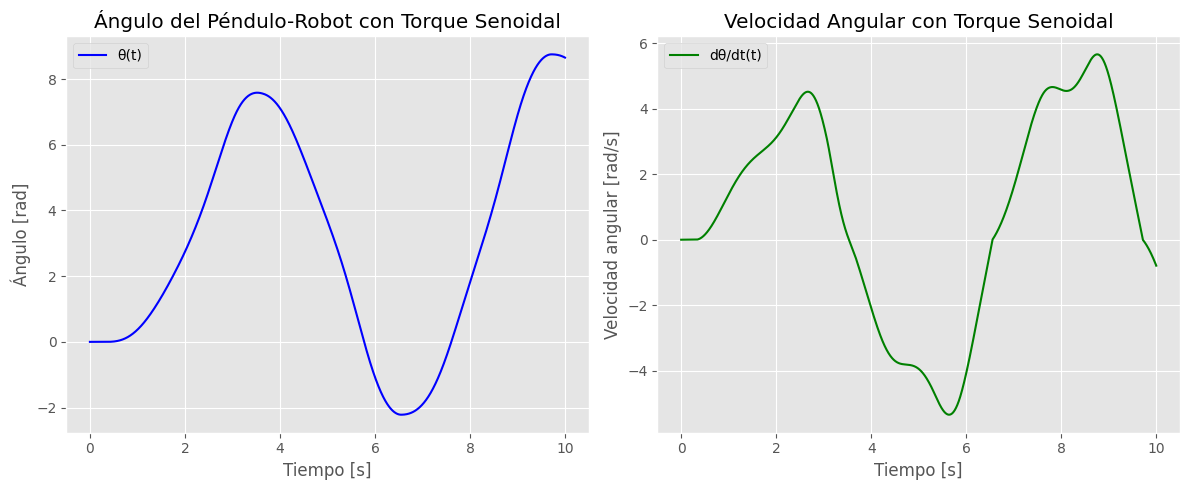

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
Ir = 0.16
m = 5
g = 9.81
lc = 0.01
b = 0.14
fc = 0.45

# Modelo dinámico con torque sinusoidal
def pendulo_robot(t, x):
    theta = x[0]
    dtheta = x[1]
    tau = 1.5 * np.sin(t)  # Torque variable
    sgn = np.sign(dtheta) if dtheta != 0 else 0
    d2theta = (tau - b*dtheta - fc*sgn - m*g*lc*np.sin(theta)) / Ir
    return [dtheta, d2theta]

# Condiciones iniciales
x0 = [0.0, 0.0]

# Tiempo de simulación
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Integrar
sol = solve_ivp(pendulo_robot, t_span, x0, t_eval=t_eval)

# Estilo siempre disponible
plt.style.use('ggplot')

# Graficar
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='θ(t)', color='blue')
plt.title('Ángulo del Péndulo-Robot con Torque Senoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='dθ/dt(t)', color='green')
plt.title('Velocidad Angular con Torque Senoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad angular [rad/s]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

